文字認識 - 手書き数字を判定する

手書き数字の光学認識データセットを持ってくる

In [0]:
from sklearn import datasets
digits = datasets.load_digits()

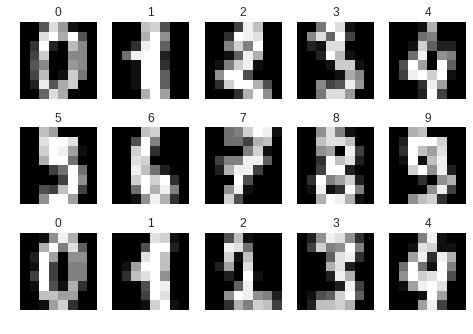

In [3]:
import matplotlib.pyplot as plt

for i in range(15):
  plt.subplot(3, 5, i+1)
  plt.axis("off")
  plt.title(str(digits.target[i]))
  plt.imshow(digits.images[i], cmap="gray")
  
plt.show()

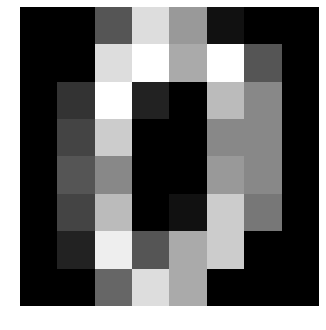

[[ 0.  0.  5. 13.  9.  1.  0.  0.]
 [ 0.  0. 13. 15. 10. 15.  5.  0.]
 [ 0.  3. 15.  2.  0. 11.  8.  0.]
 [ 0.  4. 12.  0.  0.  8.  8.  0.]
 [ 0.  5.  8.  0.  0.  9.  8.  0.]
 [ 0.  4. 11.  0.  1. 12.  7.  0.]
 [ 0.  2. 14.  5. 10. 12.  0.  0.]
 [ 0.  0.  6. 13. 10.  0.  0.  0.]]


In [6]:
d0 = digits.images[0]
plt.imshow(d0, cmap="gray")
plt.axis("off")
plt.show()
print(d0)

それではこの画像群を使って機械学習をする

ml_digits.py

In [12]:
from sklearn.model_selection import train_test_split
from sklearn import datasets, svm, metrics
from sklearn.metrics import accuracy_score

#データを読み込む
digits = datasets.load_digits()
x = digits.images
y = digits.target
#二次元配列を一次元配列に変換
x = x.reshape((-1, 64))

#データを学習用とテスト用に分割する
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

#データを学習
clf = svm.LinearSVC()
clf.fit(x_train, y_train)

#予測して精度を確認する
y_pred = clf.predict(x_test)
print("精度:", accuracy_score(y_test, y_pred))

精度: 0.9611111111111111


学習済みデータの保存

In [13]:
from sklearn.externals import joblib
joblib.dump(clf, "digits.pkl")

['digits.pkl']

predict_myimage.py

img13.png = 3


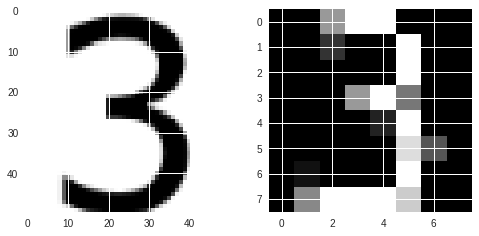

In [22]:
import cv2
from sklearn.externals import joblib
import matplotlib.pyplot as plt

def predict_digit(filename):
  #学習済みデータを読み込む
  clf = joblib.load("digits.pkl")
  #画像ファイルを読み込む
  my_img = cv2.imread(filename)
  #画像データを学習済みデータに合わせる
  my_img = cv2.cvtColor(my_img, cv2.COLOR_BGR2GRAY)
  
  plt.subplot(1, 2, 1)
  plt.imshow(my_img, cmap="gray")
  
  my_img = cv2.resize(my_img, (8, 8))
  my_img = 15 - my_img // 16
  
  plt.subplot(1, 2, 2)
  plt.imshow(my_img, cmap="gray")
  
  #二次元配列を一次元配列に変換
  my_img = my_img.reshape((-1, 64))
  #データを予想する
  res = clf.predict(my_img)
  return res[0]

n = predict_digit("img13.png")
print("img13.png = " + str(n))